# **IMPORTING LIBRARIES**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

/kaggle/input/youtube-sports-channels-statistics/yt_sports_channels_stats.csv


# **UNDERSTANDING DATA**

In [2]:
df=pd.read_csv('/kaggle/input/youtube-sports-channels-statistics/yt_sports_channels_stats.csv')

In [3]:
df.head()

,channel_id,channel_title,start_date,video_count,view_count,subscriber_count
0,UC2t9imwIR7xlDfma3CmRKJQ,T Sports,2020-10-02T06:43:03.408024Z,14819,785671940,4330000
1,UCCLdGxMC4fwkaQ4AIcL7Z8w,A Sports,2016-12-22T11:40:02Z,2615,309695531,998000
2,UCNAf1k0yIjyGu3k9BwAg3lg,Sky Sports Premier League,2015-07-06T11:11:54Z,10715,3898162997,4830000
3,UCmEgRY1A2263UXrQhjDuU0Q,Sports Digitale,2019-09-17T08:14:58Z,2721,122005864,446000
4,UCJUCcJUeh0Cz2xyKwkw5Q1w,beIN SPORTS,2014-02-21T08:25:40Z,5265,1373454279,11200000


In [4]:
df.tail()

,channel_id,channel_title,start_date,video_count,view_count,subscriber_count
553,UCuw7yEPkoDxgkHVqafq-o8A,Sports 365 Live Chanel,2018-04-17T19:59:43Z,28,360400,608
554,UCurcOeWONJE1v7cKGpniwtg,A Sports Network,2023-10-06T07:10:36.756122Z,47,3049,187
555,UCsCyYxxzG1oOFEaH2HoKz-g,Sports x,2023-08-04T04:37:45.22868Z,69,47514,88
556,UCC0PwgMUKE3eNfq4zGXiNEw,TC sports club,2023-06-28T16:47:15.289946Z,5,22,7
557,UCNv4Oc_Zv6UhzqI0tU8XX1Q,Sports Network,2023-09-16T05:30:00.440173Z,3,49,4


In [5]:
df.shape   # checking rows and columns

(558, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   channel_id        558 non-null    object
 1   channel_title     558 non-null    object
 2   start_date        558 non-null    object
 3   video_count       558 non-null    int64 
 4   view_count        558 non-null    int64 
 5   subscriber_count  558 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 26.3+ KB


In [7]:
df.isnull().sum()    # checking if there are null values 

channel_id          0
channel_title       0
start_date          0
video_count         0
view_count          0
subscriber_count    0
dtype: int64

In [8]:
#(df['video_count']<0).sum()     #Checking if any negative value present
#(df['view_count']<0).sum()
(df['subscriber_count']<0).sum()

0

In [9]:
df['start_date'] = pd.to_datetime(df['start_date'], format='ISO8601')  # 'format' instructing Pandas to automatically recognize and parse any date-time string that adheres to any version of the ISO 8601 standard.

In [10]:
df['start_date'].head()

0   2020-10-02 06:43:03.408024+00:00
1          2016-12-22 11:40:02+00:00
2          2015-07-06 11:11:54+00:00
3          2019-09-17 08:14:58+00:00
4          2014-02-21 08:25:40+00:00
Name: start_date, dtype: datetime64[ns, UTC]

In [11]:
df['start_date'].tail()

553          2018-04-17 19:59:43+00:00
554   2023-10-06 07:10:36.756122+00:00
555   2023-08-04 04:37:45.228680+00:00
556   2023-06-28 16:47:15.289946+00:00
557   2023-09-16 05:30:00.440173+00:00
Name: start_date, dtype: datetime64[ns, UTC]

In [12]:
df['year']=df['start_date'].dt.year # Extracting year from start_date column

In [13]:
df['year'].head()

0    2020
1    2016
2    2015
3    2019
4    2014
Name: year, dtype: int32

In [14]:
df['year'].tail()

553    2018
554    2023
555    2023
556    2023
557    2023
Name: year, dtype: int32

In [15]:
df.head()

,channel_id,channel_title,start_date,video_count,view_count,subscriber_count,year
0,UC2t9imwIR7xlDfma3CmRKJQ,T Sports,2020-10-02 06:43:03.408024+00:00,14819,785671940,4330000,2020
1,UCCLdGxMC4fwkaQ4AIcL7Z8w,A Sports,2016-12-22 11:40:02+00:00,2615,309695531,998000,2016
2,UCNAf1k0yIjyGu3k9BwAg3lg,Sky Sports Premier League,2015-07-06 11:11:54+00:00,10715,3898162997,4830000,2015
3,UCmEgRY1A2263UXrQhjDuU0Q,Sports Digitale,2019-09-17 08:14:58+00:00,2721,122005864,446000,2019
4,UCJUCcJUeh0Cz2xyKwkw5Q1w,beIN SPORTS,2014-02-21 08:25:40+00:00,5265,1373454279,11200000,2014


In [16]:
df.tail()

,channel_id,channel_title,start_date,video_count,view_count,subscriber_count,year
553,UCuw7yEPkoDxgkHVqafq-o8A,Sports 365 Live Chanel,2018-04-17 19:59:43+00:00,28,360400,608,2018
554,UCurcOeWONJE1v7cKGpniwtg,A Sports Network,2023-10-06 07:10:36.756122+00:00,47,3049,187,2023
555,UCsCyYxxzG1oOFEaH2HoKz-g,Sports x,2023-08-04 04:37:45.228680+00:00,69,47514,88,2023
556,UCC0PwgMUKE3eNfq4zGXiNEw,TC sports club,2023-06-28 16:47:15.289946+00:00,5,22,7,2023
557,UCNv4Oc_Zv6UhzqI0tU8XX1Q,Sports Network,2023-09-16 05:30:00.440173+00:00,3,49,4,2023


In [17]:
df['engagement_rate']=round(df['view_count']/df['subscriber_count'],2)

In [18]:
dist_across_channels=df.groupby('channel_title')[['video_count','view_count','subscriber_count','engagement_rate']].sum()

In [19]:
dist_across_channels

,video_count,view_count,subscriber_count,engagement_rate
channel_title,,,,
365 Sports,6655,24283957,38600,629.12
440 Sports,801,230075,1780,129.26
49ers Report by Chat Sports,2256,36300055,131000,277.10
519 Sports Online,7622,6072915,13600,446.54
7070Sports.,6037,195408577,657000,297.43
...,...,...,...,...
නව වාසනා - Sports Team,303,3557554,13800,257.79
動滋Sports,1005,1937572,9260,209.24
日テレスポーツ【公式】,2394,84293238,127000,663.73


In [20]:
dist_across_channels.nlargest(10,'subscriber_count')   #Sports channel has highest subscriber count but has the lowest view_count

,video_count,view_count,subscriber_count,engagement_rate
channel_title,,,,
Sports,64,13877017,74945506,510.79
beIN SPORTS,5265,1373454279,11200000,122.63
TNT Sports Brasil,6991,2661398591,10700000,248.73
LALIGA EA SPORTS,45199,3020014777,9970000,302.91
Rabbitholebd Sports,3090,1486347417,9200000,161.56
Star Sports,18330,2701624691,7210000,374.71
TNT Sports,13478,3481324860,5280000,659.34
EA SPORTS FC,821,899232758,5100000,176.32
Sky Sports Premier League,10715,3898162997,4830000,807.07


In [21]:
dist_across_channels.nsmallest(10,'subscriber_count')

,video_count,view_count,subscriber_count,engagement_rate
channel_title,,,,
ALL SPORTS,3,11,0,inf
Altitude Sports,0,0,0,0.0
Bad At Sports - Topic,2,48,0,inf
BetVictor Sports Bets & Casino,0,0,0,0.0
Betway Live Sports Betting App,0,0,0,0.0
Cee Sport Big Ceeza - Topic,4,8,0,inf
Dan Sports - Topic,1,291,0,inf
Estadat Sports - Topic,1,315,0,inf
Funny Tv Sports,2,1,0,inf


In [22]:
dist_across_channels.nlargest(10,'view_count')

,video_count,view_count,subscriber_count,engagement_rate
channel_title,,,,
Sky Sports Premier League,10715,3898162997,4830000,807.07
TNT Sports,13478,3481324860,5280000,659.34
NBC Sports,28484,3193685742,3690000,865.50
LALIGA EA SPORTS,45199,3020014777,9970000,302.91
Sports Central,28347,2815015958,4720000,596.40
Star Sports,18330,2701624691,7210000,374.71
TNT Sports Brasil,6991,2661398591,10700000,248.73
Kplus Sports,11209,2460868921,2860000,860.44
News24 Sports,24752,2039718299,3290000,619.98


In [23]:
dist_across_channels.nsmallest(10,'view_count')

,video_count,view_count,subscriber_count,engagement_rate
channel_title,,,,
Altitude Sports,0,0,0,0.0
Backyard Sports: Sandlot Sluggers - Topic,0,0,21,0.0
BetVictor Sports Bets & Casino,0,0,0,0.0
Betway Live Sports Betting App,0,0,0,0.0
Celebrity Sports Showdown - Topic,0,0,9,0.0
Drive Ahead! Sports - Topic,0,0,39,0.0
Looney Tunes Galactic Sports - Topic,0,0,5,0.0
MUSIC FOR SPORTS AND GYM - Topic,0,0,2,0.0
Multi Sports - Topic,0,0,0,0.0


In [24]:
small_threshold = df['subscriber_count'].quantile(0.33)  
medium_threshold = df['subscriber_count'].quantile(0.66)

In [25]:
df['channel_size'] = pd.cut(df['subscriber_count'],
                            bins=[-1, small_threshold, medium_threshold, df['subscriber_count'].max()],
                            labels=['Small', 'Medium', 'Large'])


In [26]:
df['channel_size'].value_counts()

channel_size
Large     190
Small     184
Medium    184
Name: count, dtype: int64

In [27]:
corr_matrix=df[['video_count','view_count','subscriber_count','engagement_rate']].corr()

In [28]:
corr_matrix

,video_count,view_count,subscriber_count,engagement_rate
video_count,1.000000,0.637878,0.157760,0.337806
view_count,0.637878,1.000000,0.264835,0.257367
subscriber_count,0.157760,0.264835,1.000000,-0.011653
engagement_rate,0.337806,0.257367,-0.011653,1.000000


In [29]:
yearly_stats=df.groupby('year')[['view_count','subscriber_count']].sum()

In [30]:
yearly_growth=yearly_stats.pct_change()*100          # Calculating year over year growth

In [31]:
yearly_growth  

,view_count,subscriber_count
year,,
2005,NaN,NaN
2006,2771.503886,1963.761468
2007,-79.457033,-87.902645
2008,-95.289964,-88.626759
2009,7743.979351,6615.938611
2010,-79.333967,-88.297124
2011,51.504456,66.217205
2012,262.113156,251.227215
2013,29.038225,562.451425


# **EXPLORATORY DATA ANALYSIS (EDA)**


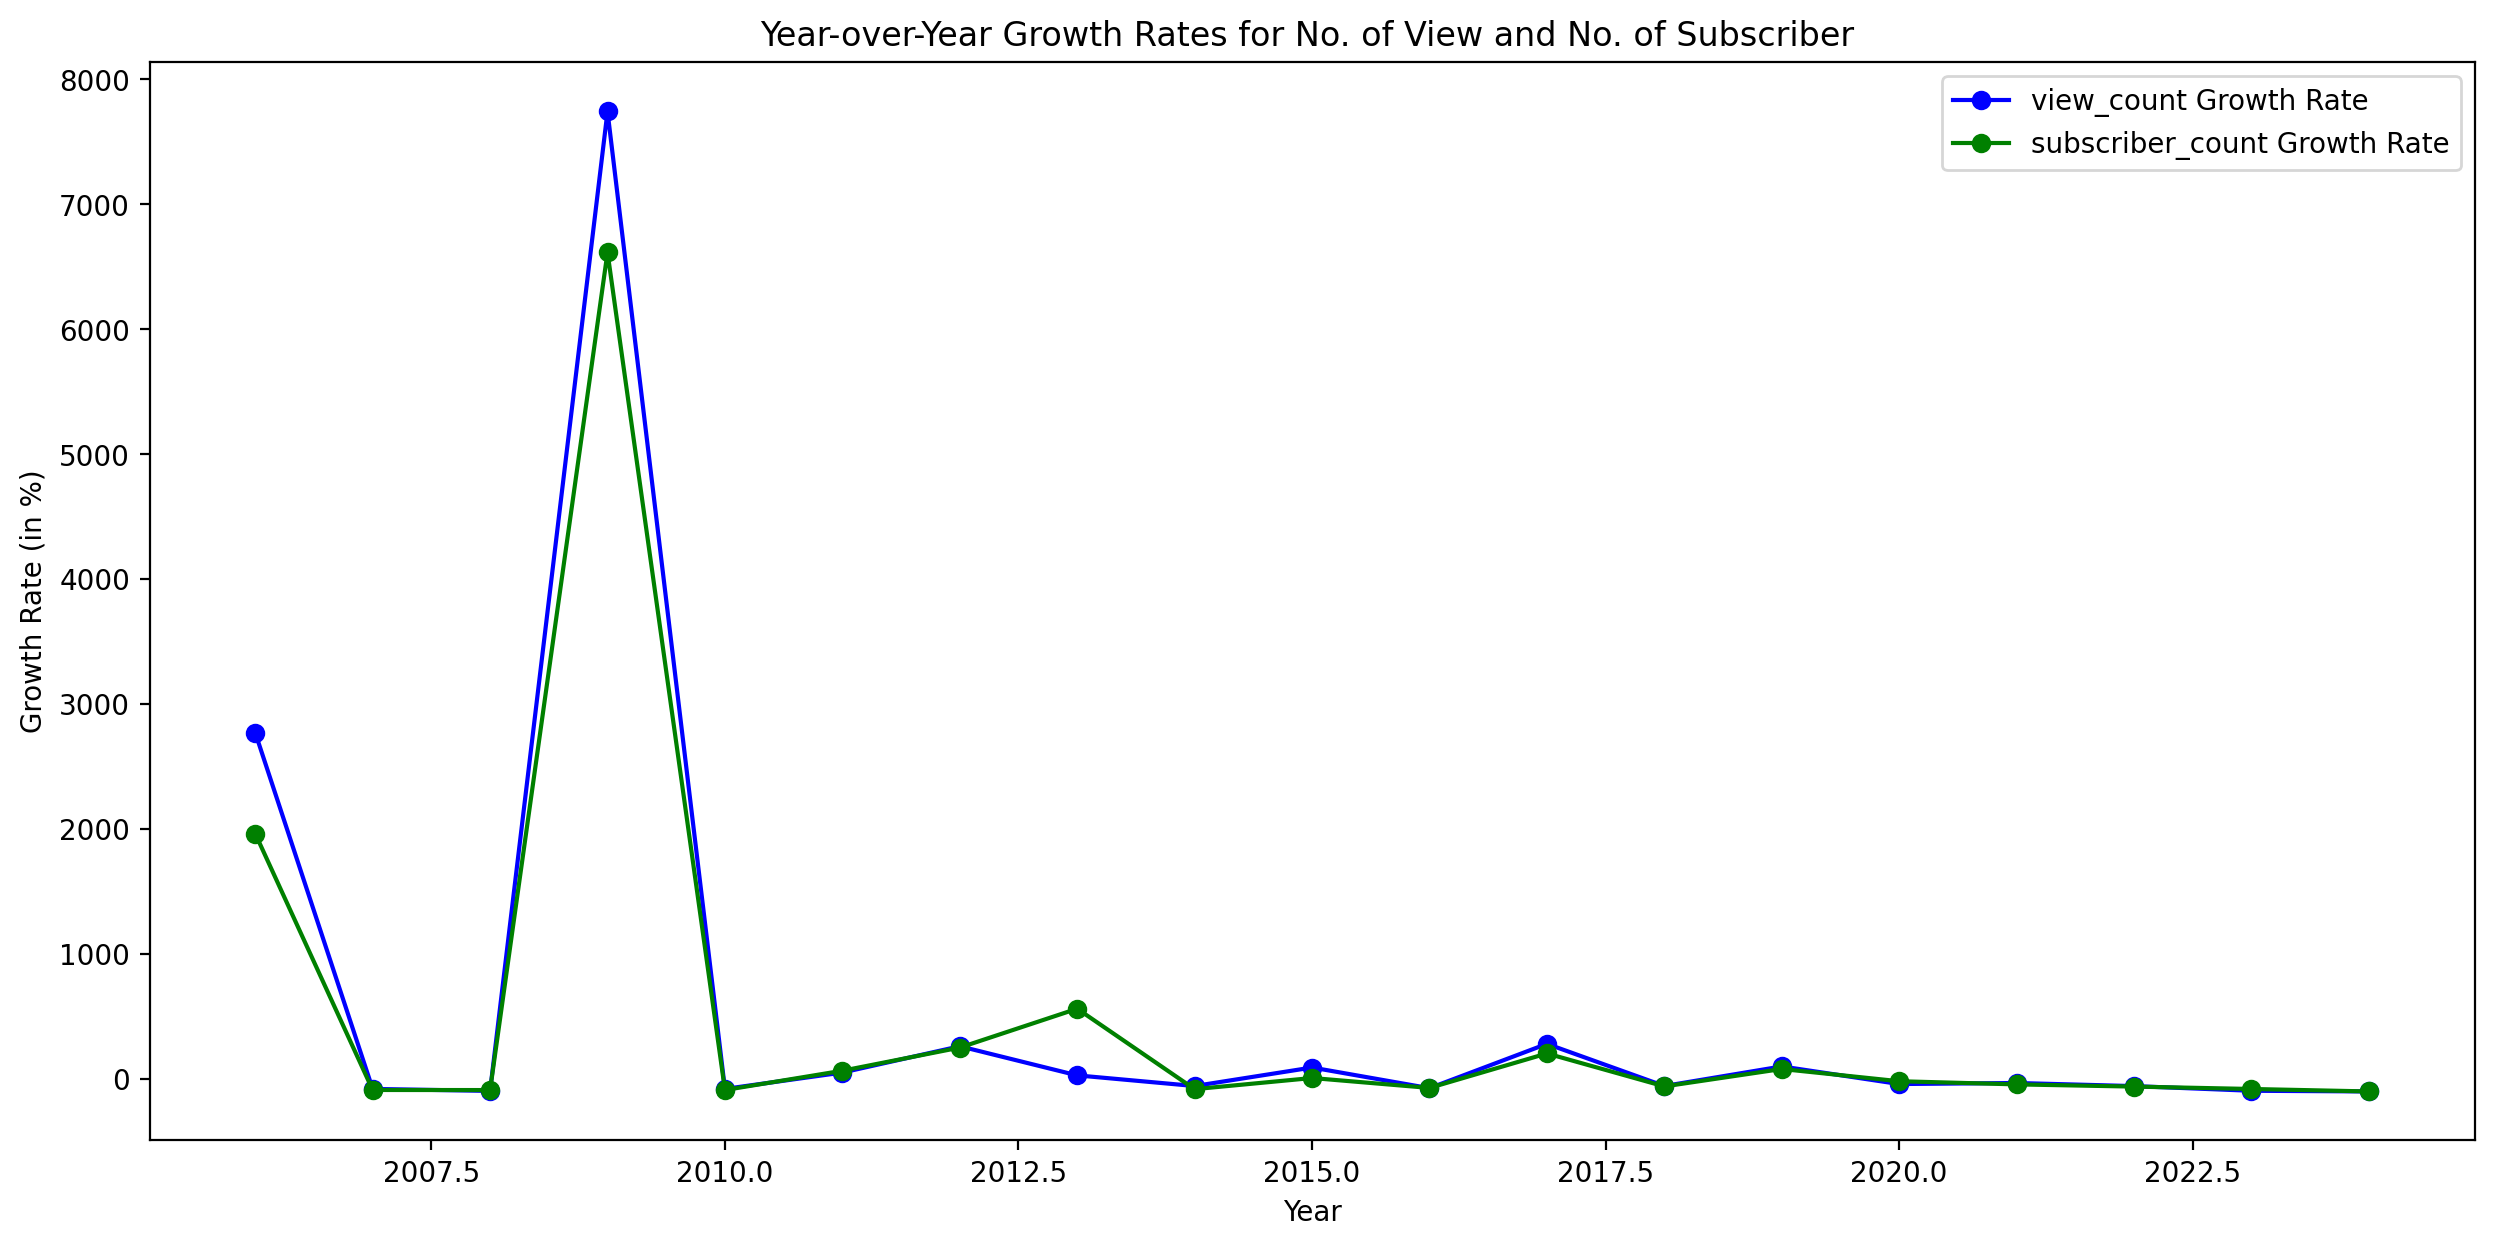

In [32]:
plt.figure(figsize=(15,7),dpi=200)
for column, color in zip(['view_count', 'subscriber_count'], ['blue', 'green']):
    plt.plot(yearly_growth.index, yearly_growth[column], label=f'{column} Growth Rate', color=color, marker='o')

plt.title('Year-over-Year Growth Rates for No. of View and No. of Subscriber ')
plt.xlabel('Year')
plt.ylabel('Growth Rate (in %)')
plt.legend()

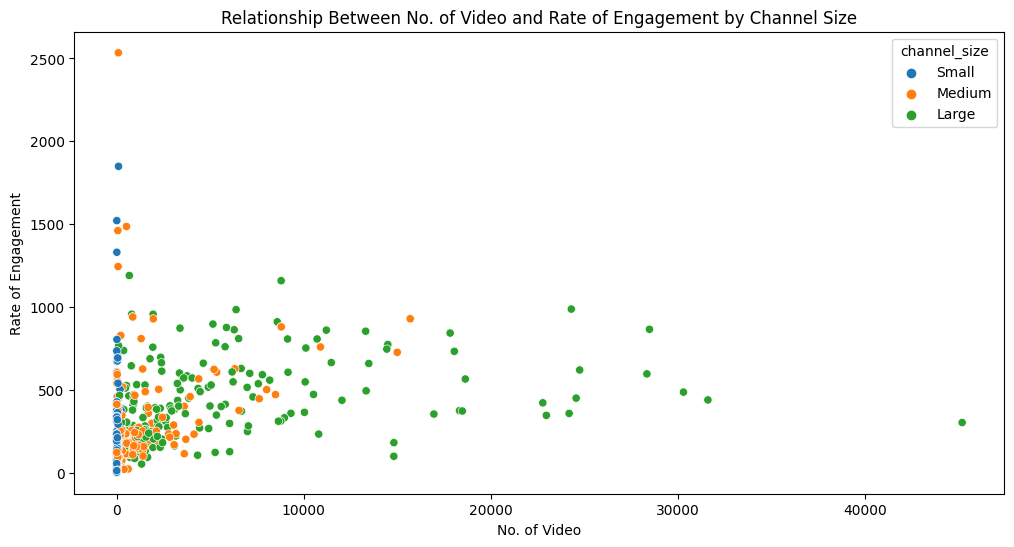

In [33]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='video_count',y='engagement_rate',data=df,hue='channel_size')
plt.title('Relationship Between No. of Video and Rate of Engagement by Channel Size')
plt.xlabel('No. of Video')
plt.ylabel('Rate of Engagement')
plt.show()

# **CONCLUSION**

> From the graph we can conclude that the growth of youtube sports channel was maximum in between 2008 to 2010 , whereas from 2017 onward there is a dip in the growth of youtube sports channel
